In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm, multivariate_normal

from kdelearn.ckde import CKDE
from kdelearn.ckde_tasks import CKDEClassification, CKDEOutliersDetection, CKDEClustering

# CKDE

In [4]:
np.random.seed(0)


m_train = 500
mean1 = [0, 0]
mean2 = [3, 0]
cov1 = [[1, 0.5], [0.5, 1]]
cov2 = [[1, -0.5], [-0.5, 1]]

z_train1 = np.random.multivariate_normal(mean1, cov1, m_train // 2)
x_train1 = z_train1[:, 0:1]
w_train1 = z_train1[:, 1:2]
labels_train1 = np.full(m_train // 2, 1)

z_train2 = np.random.multivariate_normal(mean2, cov2, m_train // 2)
x_train2 = z_train2[:, 0:1]
w_train2 = z_train2[:, 1:2]
labels_train2 = np.full(m_train // 2, 2)

z_train = np.concatenate((z_train1, z_train2), axis=0)
x_train = np.concatenate((x_train1, x_train2), axis=0)
w_train = np.concatenate((w_train1, w_train2), axis=0)
labels_train = np.concatenate((labels_train1, labels_train2), axis=0)



x_grid = np.linspace(-4, 6, 100)[:, None]
w_star = np.array([0.0])
w_grid = np.full((100, 1), 0.0)
z_grid = np.concatenate((x_grid, w_grid), axis=1)

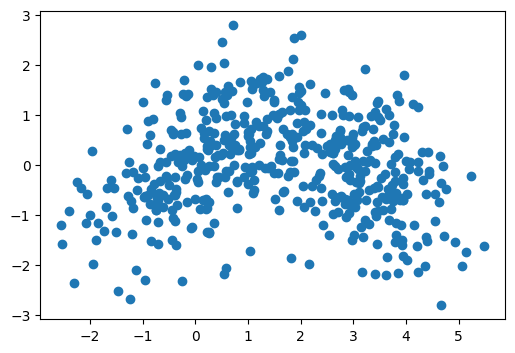

In [5]:
plt.figure(figsize=(6, 4))
plt.scatter(x_train, w_train)
plt.show()

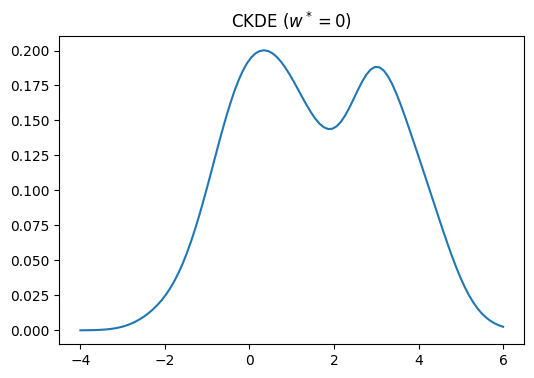

In [6]:
ckde = CKDE().fit(x_train, w_train, w_star)
scores, d = ckde.pdf(x_grid)

plt.figure(figsize=(6, 4))

plt.plot(x_grid, scores)

plt.title("CKDE ($w^*=0$)")
plt.show()

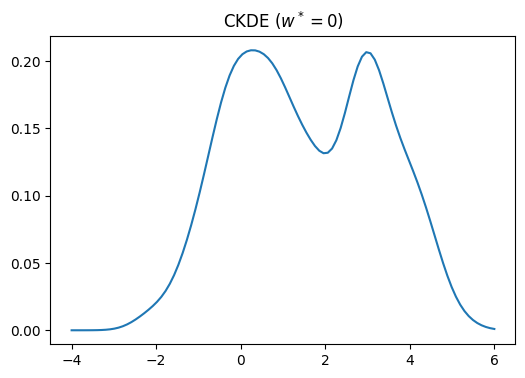

In [7]:
ckde = CKDE().fit(x_train, w_train, w_star, bandwidth_method="direct_plugin")
scores, d = ckde.pdf(x_grid)

plt.figure(figsize=(6, 4))

plt.plot(x_grid, scores)

plt.title("CKDE ($w^*=0$)")
plt.show()

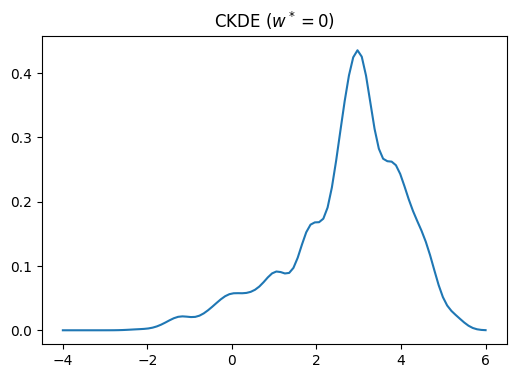

In [8]:
weights_train = np.arange(1, m_train + 1) ** 2
bandwidth_x = np.array([0.25])
bandwidth_w = np.array([0.25])

ckde = CKDE().fit(x_train, w_train, w_star, weights_train, bandwidth_x, bandwidth_w)
scores, d = ckde.pdf(x_grid)

plt.figure(figsize=(6, 4))

plt.plot(x_grid, scores)

plt.title("CKDE ($w^*=0$)")
plt.show()

In [9]:
# from kdelearn.kde import KDE

# scores_z = KDE().fit(z_train).pdf(z_grid)
# scores_w = KDE().fit(w_train).pdf(w_grid)

# plt.plot(x_grid, scores_z / scores_w)
# plt.grid()

# Tasks

## CKDEClassification

19.799249632134195


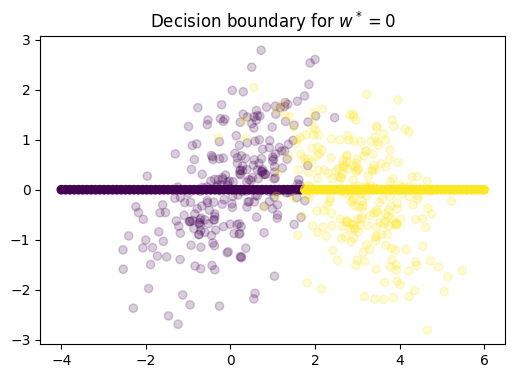

In [10]:
classifier = CKDEClassification().fit(x_train, w_train, w_star, labels_train)
labels_pred = classifier.predict(x_grid)
print(classifier.pdfs(x_grid).sum())

plt.figure(figsize=(6, 4))

plt.scatter(x_grid, w_grid, c=labels_pred)
plt.scatter(z_train[:, 0], z_train[:, 1], c=labels_train, alpha=0.2)

plt.title("Decision boundary for $w^*=0$")
plt.show()

19.79747361633142


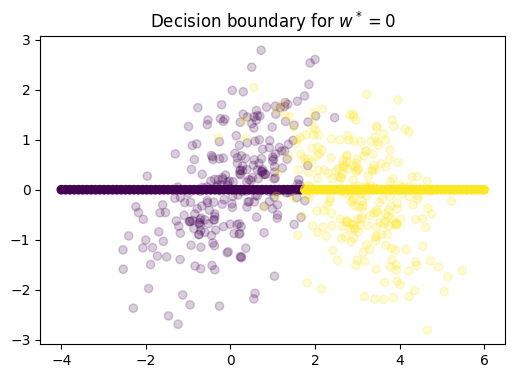

In [11]:
classifier = CKDEClassification().fit(x_train, w_train, w_star, labels_train, share_bandwidth=True, bandwidth_method="direct_plugin")
labels_pred = classifier.predict(x_grid)
print(classifier.pdfs(x_grid).sum())

plt.figure(figsize=(6, 4))

plt.scatter(x_grid, w_grid, c=labels_pred)
plt.scatter(z_train[:, 0], z_train[:, 1], c=labels_train, alpha=0.2)

plt.title("Decision boundary for $w^*=0$")
plt.show()

19.79953120739598


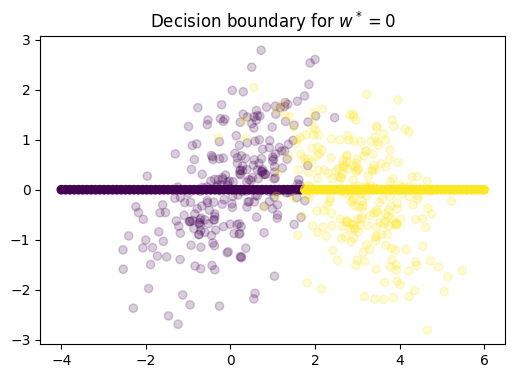

In [12]:
classifier = CKDEClassification().fit(x_train, w_train, w_star, labels_train, bandwidth_method="direct_plugin")
labels_pred = classifier.predict(x_grid)
print(classifier.pdfs(x_grid).sum())

plt.figure(figsize=(6, 4))

plt.scatter(x_grid, w_grid, c=labels_pred)
plt.scatter(z_train[:, 0], z_train[:, 1], c=labels_train, alpha=0.2)

plt.title("Decision boundary for $w^*=0$")
plt.show()

19.798988780573477


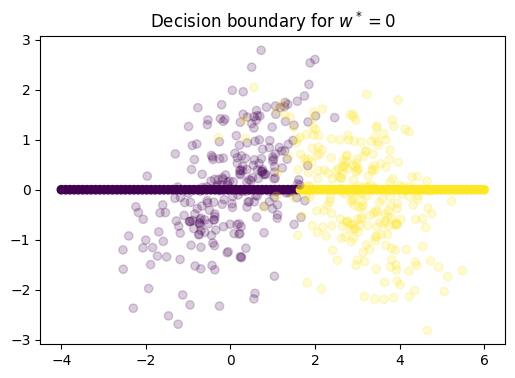

In [13]:
weights_train = np.arange(1, m_train + 1) ** 2

classifier = CKDEClassification().fit(x_train, w_train, w_star, labels_train, weights_train=weights_train)
labels_pred = classifier.predict(x_grid)
print(classifier.pdfs(x_grid).sum())

plt.figure(figsize=(6, 4))

plt.scatter(x_grid, w_grid, c=labels_pred)
plt.scatter(z_train[:, 0], z_train[:, 1], c=labels_train, alpha=0.2)

plt.title("Decision boundary for $w^*=0$")
plt.show()

## CKDEOutliersDetection

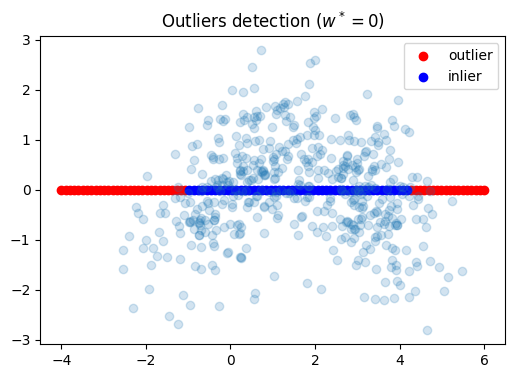

In [14]:
outliers_detection = CKDEOutliersDetection().fit(x_train, w_train, w_star)
labels_pred = outliers_detection.predict(x_grid)

outliers = labels_pred == 1
inliers = labels_pred == 0

plt.figure(figsize=(6, 4))

plt.scatter(x_grid[outliers], w_grid[outliers], c="r", label="outlier")
plt.scatter(x_grid[inliers], w_grid[inliers], c="blue", label="inlier")
plt.scatter(z_train[:, 0], z_train[:, 1], alpha=0.2)

plt.title(f"Outliers detection ($w^*=0$)")
plt.legend()
plt.show()

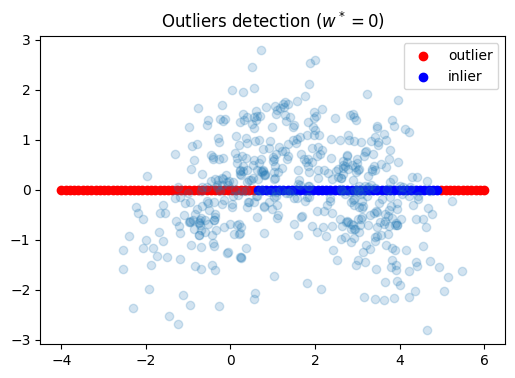

In [15]:
weights_train = np.arange(1, m_train + 1) ** 2
bandwidth_x = np.array([0.25])
bandwidth_w = np.array([0.25])

outliers_detection = CKDEOutliersDetection().fit(x_train, w_train, w_star,
                                                 weights_train=weights_train,
                                                 bandwidth_x=bandwidth_x, bandwidth_w=bandwidth_w)
labels_pred = outliers_detection.predict(x_grid)

outliers = labels_pred == 1
inliers = labels_pred == 0

plt.figure(figsize=(6, 4))

plt.scatter(x_grid[outliers], w_grid[outliers], c="r", label="outlier")
plt.scatter(x_grid[inliers], w_grid[inliers], c="blue", label="inlier")
plt.scatter(z_train[:, 0], z_train[:, 1], alpha=0.2)

plt.title(f"Outliers detection ($w^*=0$)")
plt.legend()
plt.show()

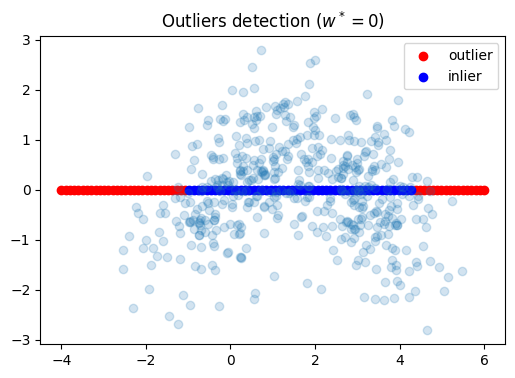

In [16]:
outliers_detection = CKDEOutliersDetection().fit(x_train, w_train, w_star,
                                                 bandwidth_method="direct_plugin")
labels_pred = outliers_detection.predict(x_grid)

outliers = labels_pred == 1
inliers = labels_pred == 0

plt.figure(figsize=(6, 4))

plt.scatter(x_grid[outliers], w_grid[outliers], c="r", label="outlier")
plt.scatter(x_grid[inliers], w_grid[inliers], c="blue", label="inlier")
plt.scatter(z_train[:, 0], z_train[:, 1], alpha=0.2)

plt.title(f"Outliers detection ($w^*=0$)")
plt.legend()
plt.show()

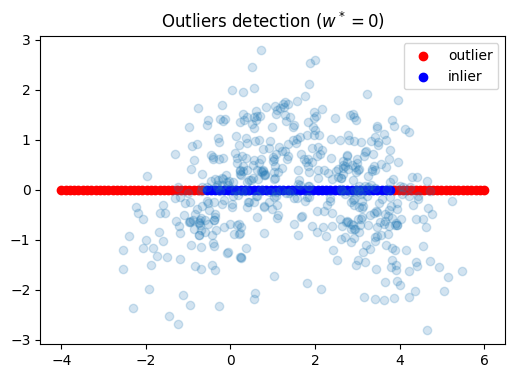

In [17]:
outliers_detection = CKDEOutliersDetection().fit(x_train, w_train, w_star,
                                                 r=0.2)
labels_pred = outliers_detection.predict(x_grid)

outliers = labels_pred == 1
inliers = labels_pred == 0

plt.figure(figsize=(6, 4))

plt.scatter(x_grid[outliers], w_grid[outliers], c="r", label="outlier")
plt.scatter(x_grid[inliers], w_grid[inliers], c="blue", label="inlier")
plt.scatter(z_train[:, 0], z_train[:, 1], alpha=0.2)

plt.title(f"Outliers detection ($w^*=0$)")
plt.legend()
plt.show()

## CKDEClustering

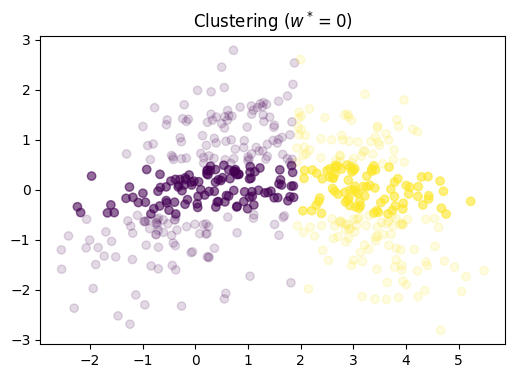

In [18]:
clustering = CKDEClustering().fit(x_train, w_train, w_star)
labels_pred = clustering.predict("gradient_ascent")



plt.figure(figsize=(6, 4))

plt.scatter(z_train[:, 0], z_train[:, 1], c=labels_pred, alpha=0.15)

mask = (w_train[:, 0] > -0.5) & (w_train[:, 0] < 0.5)
plt.scatter(z_train[mask, 0], z_train[mask, 1], c=labels_pred[mask], alpha=0.5)

plt.title(f"Clustering ($w^*=0$)")
plt.show()

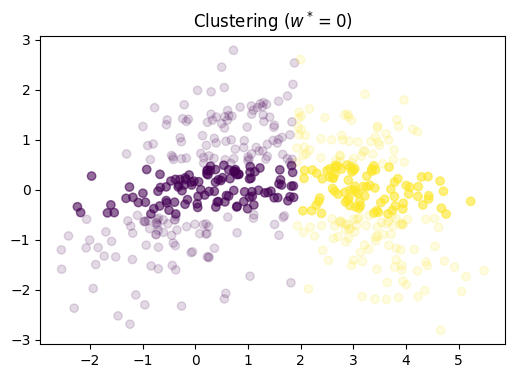

In [19]:
clustering = CKDEClustering().fit(x_train, w_train, w_star)
labels_pred = clustering.predict("mean_shift")



plt.figure(figsize=(6, 4))

plt.scatter(z_train[:, 0], z_train[:, 1], c=labels_pred, alpha=0.15)

mask = (w_train[:, 0] > -0.5) & (w_train[:, 0] < 0.5)
plt.scatter(z_train[mask, 0], z_train[mask, 1], c=labels_pred[mask], alpha=0.5)

plt.title(f"Clustering ($w^*=0$)")
plt.show()

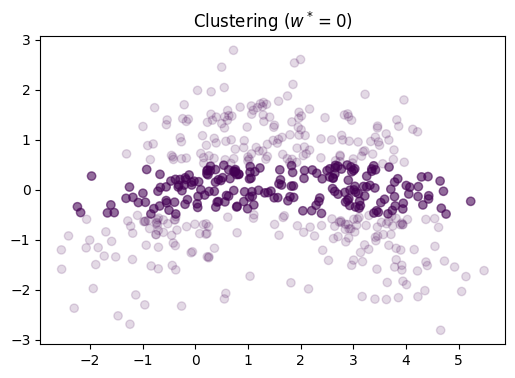

In [20]:
weights_train = np.arange(1, m_train + 1) ** 2
bandwidth_x = np.array([0.25])
bandwidth_w = np.array([0.25])

clustering = CKDEClustering().fit(x_train, w_train, w_star,
                                  weights_train=weights_train,
                                  bandwidth_x=bandwidth_x, bandwidth_w=bandwidth_w)
labels_pred = clustering.predict("gradient_ascent")



plt.figure(figsize=(6, 4))

plt.scatter(z_train[:, 0], z_train[:, 1], c=labels_pred, alpha=0.15)

mask = (w_train[:, 0] > -0.5) & (w_train[:, 0] < 0.5)
plt.scatter(z_train[mask, 0], z_train[mask, 1], c=labels_pred[mask], alpha=0.5)

plt.title(f"Clustering ($w^*=0$)")
plt.show()

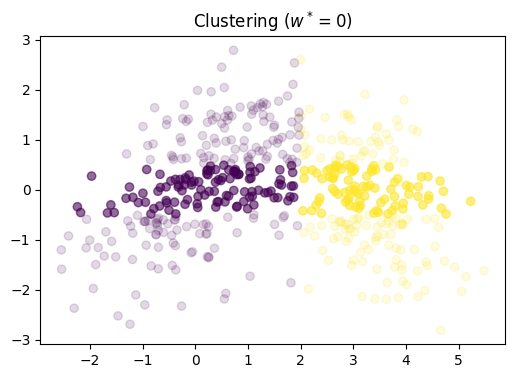

In [21]:
clustering = CKDEClustering().fit(x_train, w_train, w_star,
                                  bandwidth_method="direct_plugin")
labels_pred = clustering.predict("gradient_ascent")



plt.figure(figsize=(6, 4))

plt.scatter(z_train[:, 0], z_train[:, 1], c=labels_pred, alpha=0.15)

mask = (w_train[:, 0] > -0.5) & (w_train[:, 0] < 0.5)
plt.scatter(z_train[mask, 0], z_train[mask, 1], c=labels_pred[mask], alpha=0.5)

plt.title(f"Clustering ($w^*=0$)")
plt.show()